<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline 

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker 
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [5]:
# Nhập code của bạn ở đây:
columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv("data/pima-indians-diabetes.csv", names=columns)
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [4]:
# Nhập code của bạn ở đây:
corrs = df.corr(numeric_only=True)
corrs

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

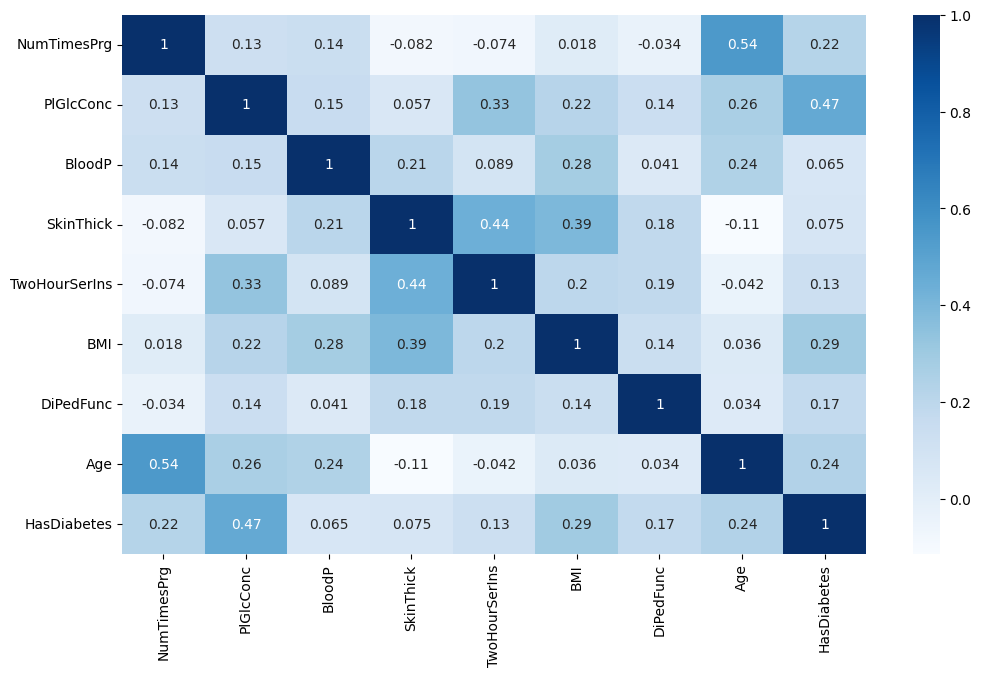

In [6]:
# Nhập code của bạn ở đây:
# visualize correlation matrix use heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corrs, annot=True, cmap="Blues")
plt.show()

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

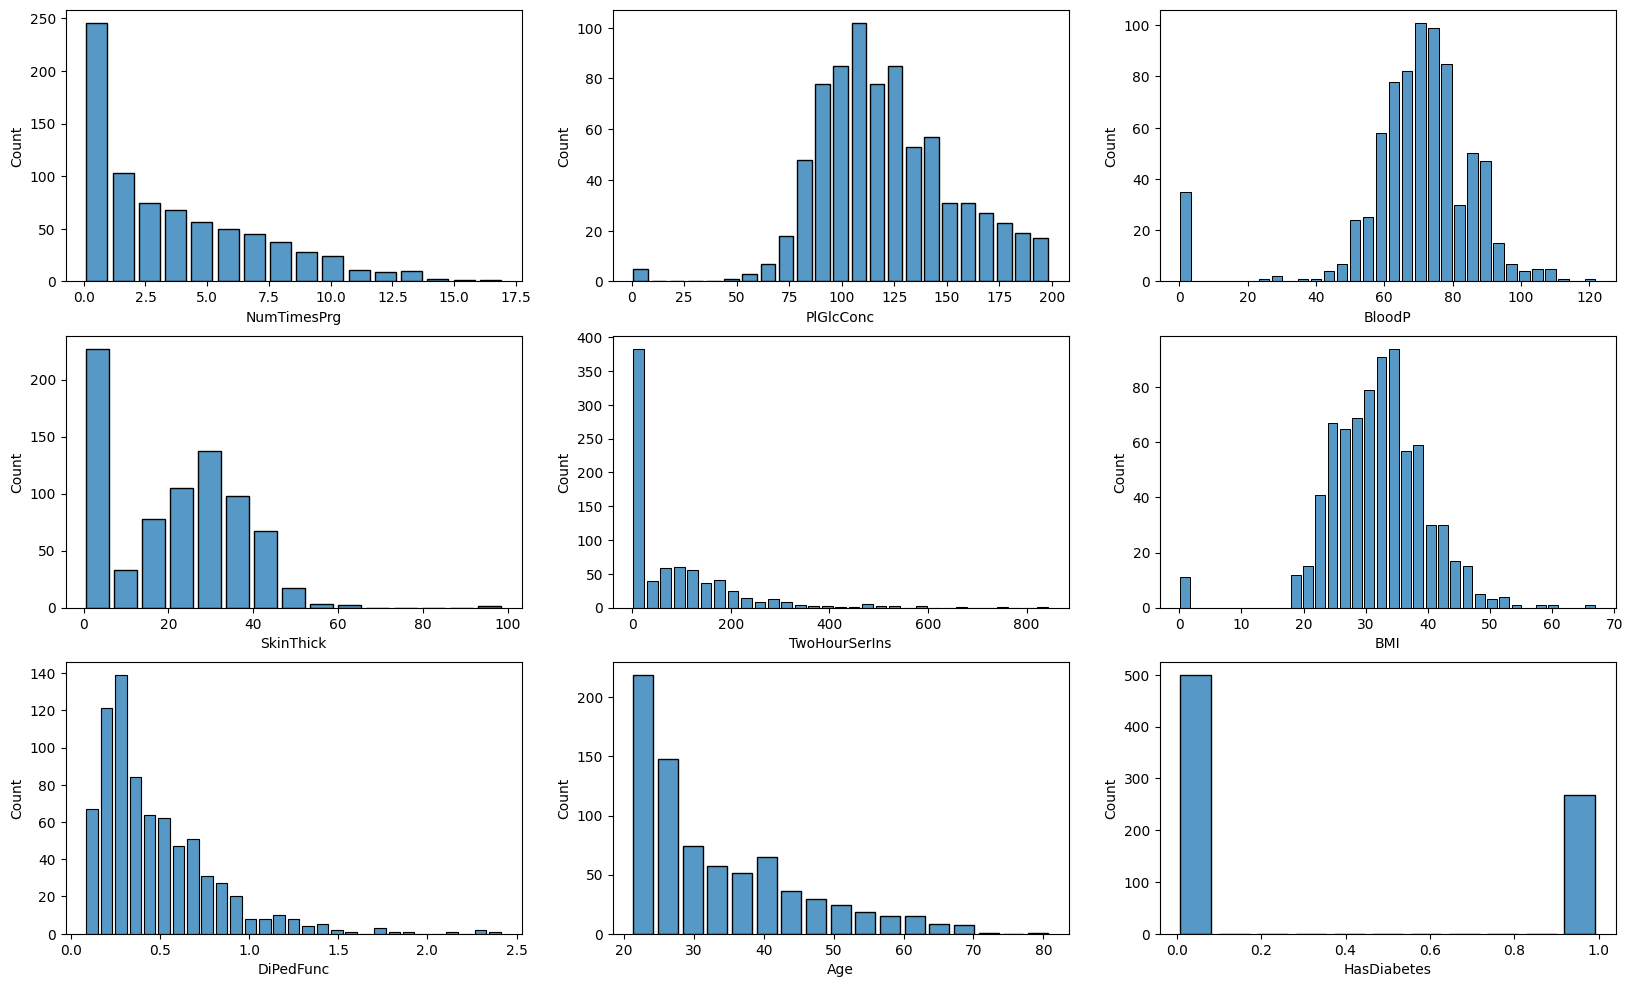

In [7]:
# Nhập code của bạn ở đây:
# config size of chart
plt.figure(figsize=(20, 12))
for index, column in enumerate(columns):
    # create subplot
    plt.subplot(3, 3, index + 1)
    # draw histogram 
    sns.histplot(data=df[column], shrink=0.8)
plt.show()

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [8]:
# Nhập code của bạn ở đây:
columns_process = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']
for column in columns_process:
    # get the most common value
    common_value = df[column].value_counts().index[0]
    df[columns].fillna(common_value, inplace=False)

## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [9]:
# Nhập code của bạn ở đây:
from sklearn.preprocessing import StandardScaler

# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

X = df[df.columns.drop("HasDiabetes")]
y = df["HasDiabetes"].values
stand_scaler = StandardScaler()
X_scaler = stand_scaler.fit_transform(X)

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [12]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, train_size=0.8, random_state=7)
data = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án: 
<p> - Ta cần chuẩn hóa dữ liệu để tránh cost function không đồng nhất và tránh mất nhiều thời gian khi training và model bị underfitting. Bởi vì sẽ có các dữ liệu có giá trị lớn hơn hoặc thấp hơn nhiều (outline) so với các giá trị khác. <p>
<p> - Trước khi huấn luyện ta nên chia dữ liệu ra các tập khác nhau. Ví dụ chia thành 2 phần, ta dành 1 phần cho training và 1 phần cho testing. Bởi vì tập train sẽ giống như tài liệu học tập và tập test đóng vai trò là 1 bài test. Với tập dữ liệu nó chưa từng được học qua, vì vậy độ chính xác sẽ được phản ảnh tốt hơn qua tập test.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [13]:
# Nhập code của bạn ở đây:
print("Positive rate diabetes on Full Dataset is: {:.2f}".format((y == 1).sum()/len(y)))
print("Postive rate diabetes on Train Dataset is: {:.2f}".format((y_train == 1).sum()/len(y_train)))
print("Postive rate diabetes on Test Dataset is: {:.2f}".format((y_test == 1).sum()/len(y_test)))


Positive rate diabetes on Full Dataset is: 0.35
Postive rate diabetes on Train Dataset is: 0.34
Postive rate diabetes on Test Dataset is: 0.37


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [14]:
from sklearn.metrics import jaccard_score, f1_score

In [15]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [12]:
# function to mapping value f1_score and jaccard_score
def bindding_score(data_name = "train", model_name="KNN", f1=0, jaccard=0):
    f1_scores[data_name][model_name] = f1
    jaccard_scores[data_name][model_name] = jaccard

In [13]:
# helper extension
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, confusion_matrix
import joblib

# display results of grid search
def grid_search_result(grid_search, model_name = "", history=False):
    print("\n===== Fine-tune " + model_name + " =====")
    print('Best score: ', grid_search.best_score_.round(4))  
    print('Best estimator: ', grid_search.best_estimator_) # NOTE: require refit=True in  SearchCV

    # if True -> print history fine tuning
    if history:
        print('Performance of hyperparameter combinations:')
        cv_results = grid_search.cv_results_
        for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
            print('score =', mean_score.round(4), params) 
            
    # return best estimator
    return grid_search.best_estimator_

# save model
def store_model(model, model_name):
    try:
        joblib.dump(model, "models/" + model_name + "_model.pkl")
        print("Save model " + model_name + " successfully!")
    except Exception as e:
        print(e)
# load model  
def load_model(model_name):
    try:
        print("Load model " + model_name + " successfully!")
        return joblib.load("models/" + model_name + "_model.pkl")
    except Exception as e:
        print(e)
# draw confistion matrix between the classes
def draw_confustion_matrix(cf_matrix, model_name):
    # visualize result with heatmap
    ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues")
    ax.set_title('Confusion Matrix with {} model\n\n'.format(model_name))
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    
    ##Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    # Display
    plt.show()

# measure the value with best model
def best_estimator_result(best_estimator, model_name, data, draw_cm=False, save_model=False):
    # Predicting on test_set
    y_pred_test = best_estimator.predict(data["X_test"])
    # Predicting on train_set
    y_pred_train = best_estimator.predict(data["X_train"])
    
    # measure on train set
    f1_score_train = f1_score(data["y_train"], y_pred_train).round(2)
    jaccard_score_train = jaccard_score(data["y_train"], y_pred_train).round(2)
    accuracy_train = accuracy_score(data["y_train"], y_pred_train).round(2)
    recall_train = recall_score(data["y_train"], y_pred_train).round(2)
    precision_train = precision_score(data["y_train"], y_pred_train).round(2)
    
    # measure on test set
    f1_score_test = f1_score(data["y_test"], y_pred_test).round(2)
    jaccard_score_test = jaccard_score(data["y_test"], y_pred_test).round(2)
    accuracy_test = accuracy_score(data["y_test"], y_pred_test).round(2)
    recall_test = recall_score(data["y_test"], y_pred_test).round(2)
    precision_test = precision_score(data["y_test"], y_pred_test).round(2)
    
    # assign score
    bindding_score(model_name=model_name[1], f1=f1_score_train, jaccard=jaccard_score_train)
    bindding_score(data_name="test",model_name=model_name[1], f1=f1_score_test, jaccard=jaccard_score_test)
    
    # print f1_score and jaccard_score
    measure = {
        "train": {
            "f1_score": f1_score_train,
            "jaccard_score": jaccard_score_train,
            "accuracy": accuracy_train,
            "recall": recall_train,
            "precision": precision_train
        },
        "test": {
            "f1_score": f1_score_test,
            "jaccard_score": jaccard_score_test,
            "accuracy": accuracy_test,
            "recall": recall_test,
            "precision": precision_test
        }
    } 
    # if True -> draw confustion matrix
    if draw_cm:
        cf_matrix = confusion_matrix(y_test, y_pred_test)
        draw_confustion_matrix(cf_matrix, model_name[0])
    
    # if True -> save model
    if save_model:
        store_model(best_estimator, model_name[0])
        
    # return dataframe measure
    return pd.DataFrame(measure)


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
# Nhập code của bạn ở đây:
# define KFold with 10 subset
cv = KFold(n_splits=10, shuffle=True, random_state=7)
# initialize KNN model
model_knn = KNeighborsClassifier()
# hyperparameter to fine turing
param_grid = [
    {
        'n_neighbors': np.arange(1, 50),
        'weights': ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"]
    }
]
# initialize grid search
grid_search_knn = GridSearchCV(model_knn, param_grid, cv=cv, verbose=3)
# start fine tuning KNN
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits
[CV 1/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.629 total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.694 total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.661 total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.803 total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.803 total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.656 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.656 total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.705 total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighb

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [15]:
# get search results
best_knn_model = grid_search_result(grid_search_knn, "KNeighborsClassifier")


===== Fine-tune KNeighborsClassifier =====
Best score:  0.7543
Best estimator:  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')


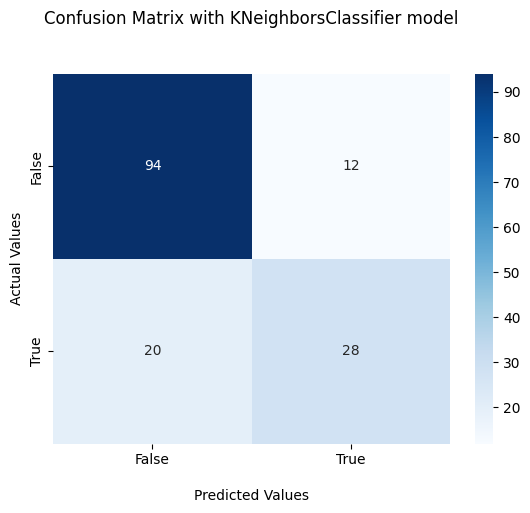

Save model KNeighborsClassifier successfully!


,train,test
f1_score,1.0,0.64
jaccard_score,1.0,0.47
accuracy,1.0,0.79
recall,1.0,0.58
precision,1.0,0.70


In [16]:
model_name = ["KNeighborsClassifier", "KNN"]
# get result of best estimator
best_estimator_result(best_knn_model, model_name, data,draw_cm=True, save_model=True)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

Trả lời:
<p> <b>n_neighbors</b>: is the number of neighbors arround a sample labeled. If n_neighbors is too small -> more sensitive to outliers. By contrast, the neighbors may be contain numerous points from other classes</p>
<p> <b>weights:</b> that is weight function use to predict sample </p>
<ul>
<li>With uniform: all points in each neighborhood are weighted equally</li>
<li>Distance: weight points by the inverse of their distance. </li>
</ul>

<p> <b>Algorithm:</b> is formula used to compute the nearest neightbors </p>


## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [17]:
from sklearn import tree

In [18]:
# Nhập code của bạn ở đây:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

# initalize Decision Tree model
model_tree = tree.DecisionTreeClassifier()
param_grid = [
    {
        'max_depth': np.arange(2, 10),
        'min_samples_leaf': np.arange(2, 40),
        "max_leaf_nodes": np.arange(3, 100, 3),
        "criterion": ['gini', 'entropy', 'log_loss']
    }
]
grid_search_tree = GridSearchCV(model_tree, param_grid, cv=cv)
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'max_leaf_nodes': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]),
                          'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])}])

In [19]:
best_tree_model = grid_search_result(grid_search_tree, "DecisionTreeClassifier")


===== Fine-tune DecisionTreeClassifier =====
Best score:  0.7703
Best estimator:  DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_leaf_nodes=24,
                       min_samples_leaf=11)


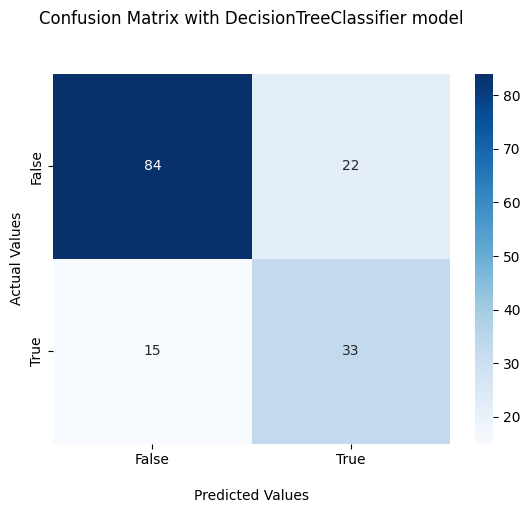

Save model DecisionTreeClassifier successfully!


,train,test
f1_score,0.73,0.64
jaccard_score,0.58,0.47
accuracy,0.82,0.76
recall,0.68,0.69
precision,0.79,0.60


In [20]:
model_name = ["DecisionTreeClassifier", "DT"]
best_estimator_result(best_tree_model, model_name, data, True, True)

In [21]:
from sklearn.tree import export_graphviz
from graphviz import Source
# visualization tree with graphviz 
export_graphviz(best_tree_model,
        out_file=r"tree.dot",
        feature_names=['NumTimesPrg',
                        'PlGlcConc',
                        'BloodP',
                        'SkinThick',
                        'TwoHourSerIns',
                        'BMI',
                        'DiPedFunc',
                        'Age'],
        class_names=['0', '1'],
        rounded=True, filled=True, leaves_parallel=True, 
        node_ids=True, proportion=False, precision=2 )

# NOTE:
#   1. After pip install graphviz, you MUST download Graphviz and extract/install it to a folder (e.g., "D:\graphviz-2.44.1-win32")
#   2. Add evironment PATH for "Graphviz\bin\" folder (e.g., "D:\graphviz-2.44.1-win32\Graphviz\bin\")
Source.from_file(r"tree.dot").render(r"tree", format='pdf', view=True, cleanup=True)

'tree.pdf'

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

Đáp án:

Trả lời:
<p> <b>criterion</b>: the parameter have the function to measure the quality of the data</p>
Include 3 mathematical formulation:
<ul>
<li>gini</li>
<li>entropy</li>
<li>log_loss</li>
</ul>
<p> <b>max_depth:</b> the maximum depth that the tree can be achieved</p>
<p> <b>max_leaf_nodes:</b> maximum number of leaf nodes a decision tree can have </p>
<p> <b>min_samples_leaf:</b> the minimum number of samples need to be at a leaf node</p>


## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [22]:
from sklearn.svm import SVC

In [23]:
# Nhập code của bạn ở đây:
cv = KFold(n_splits=6, shuffle=True, random_state=7)
# initalize SVM model
model_svc = SVC()
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'degree': np.arange(1, 20),
        "C": [0.01, 0.1, 1, 5, 10, 30, 100, 1000],
        "coef0": [0.1, 1, 5, 20, 50, 100]
    }
]
grid_search_svc = GridSearchCV(model_svc, param_grid, cv=cv, verbose=3)
grid_search_svc.fit(X_train, y_train)

Fitting 6 folds for each of 2736 candidates, totalling 16416 fits
[CV 1/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.689 total time=   0.0s
[CV 2/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.777 total time=   0.0s
[CV 3/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.814 total time=   0.0s
[CV 4/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 5/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 6/6] END C=0.01, coef0=0.1, degree=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/6] END C=0.01, coef0=0.1, degree=1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 2/6] END C=0.01, coef0=0.1, degree=1, kernel=rbf;, score=0.660 total time=   0.0s
[CV 3/6] END C=0.01, coef0=0.1, degree=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/6] END C=0.01, coef0=0.1, degree=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 5/6] END C=0.01, coef0=0.1, degree=1, kernel=rbf;, s

GridSearchCV(cv=KFold(n_splits=6, random_state=7, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 30, 100, 1000],
                          'coef0': [0.1, 1, 5, 20, 50, 100],
                          'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'kernel': ['linear', 'rbf', 'sigmoid']}],
             verbose=3)

In [24]:
best_svc_model = grid_search_result(grid_search_svc, "SVC")


===== Fine-tune SVC =====
Best score:  0.7655
Best estimator:  SVC(C=1, coef0=0.1, degree=1, kernel='linear')


In [36]:
model_name = ["SVC", "SVM"]
best_estimator_result(best_svc_model, model_name, data)

,train,test
f1_score,0.64,0.62
jaccard_score,0.47,0.45
accuracy,0.77,0.79
recall,0.57,0.56
precision,0.73,0.69


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

Đáp án:

Trả lời:
<p> <b>kernel</b>: take data as input and transform it into the neccessary form</p>
Include 5 kerel types :
<ul>
<li>linear</li>
<li>poly: popular in image processing</li>
<li>rbf: </li>
<li>sigmoid</li>
<li>precomputed</li>
</ul>
<p> <b>degree:</b> is degree of the polynomial kernel function. x**2, x**3</p>
<p> <b>C:</b> if C is larger -> will be strictly -> less or not sample can be asign internal boundary and by contrast with C is smaller</p>
<p> <b>coef0:</b>  it is only significant in ‘poly’ and ‘sigmoid’.</p>


## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Nhập code của bạn ở đây:
cv = KFold(n_splits=8, shuffle=True, random_state=7)
# initalize Logistic Regression model
model_logit = LogisticRegression()
param_grid = [
    {
        'penalty': ['l1', 'l2', "elasticnet"],
        "C": [0.001, 0.01,0.1, 1, 3, 10, 100],
        'solver':  ['lbfgs', "liblinear", "saga"]
    }
]
grid_search_logit = GridSearchCV(model_logit, param_grid, cv=cv, verbose=3)
grid_search_logit.fit(X_train, y_train)

Fitting 8 folds for each of 63 candidates, totalling 504 fits
[CV 1/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/8] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/8] END C=0.001, penalty=l1, solver=liblinear;, score=0.532 total time=   0.0s
[CV 2/8] END C=0.001, penalty=l1, solver=liblinear;, score=0.701 total time=   0.0s
[CV 3/8] END C=0.001, penalty=l1, solver=liblinear;, score=0.649 total time=   0.0s
[CV 4/8] END C=0.001, penalty=l1, solv

GridSearchCV(cv=KFold(n_splits=8, random_state=7, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 3, 10, 100],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'saga']}],
             verbose=3)

In [28]:
best_logit_model = grid_search_result(grid_search_logit, "LogisticRegression")


===== Fine-tune LogisticRegression =====
Best score:  0.7638
Best estimator:  LogisticRegression(C=0.01, solver='liblinear')


In [29]:
model_name = ["LogisticRegression", "LR"]
best_estimator_result(best_logit_model, model_name, data)

,train,test
f1_score,0.65,0.63
jaccard_score,0.48,0.46
accuracy,0.77,0.78
recall,0.60,0.60
precision,0.71,0.66


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

Trả lời:
<p> <b>penalty</b>: penalty to the logistic model for having too many variables, the result is shrinking the coef toward zero with feature less contributive. It mean small score of corrs matrix</p>
Include 3 penalty types:
<ul>
<li>l2: ridge regression -> close zero with feature less contributive</li>
<li>l1: lasso regression -> the coefficients of some less contributive features are forced to be exactly zero</li>
<li>elasticnet: the combination of l2 and l1</li>
</ul>
<p> <b>C:</b> inverse of regularization strengthLike in support vector machines</p>
<p> <b>solver:</b> use to the optimization problem</p>
<ul>
    <li>lbfgs: [l2, None penalty]</li>
    <li>liblinear: [l1, l2]</li>
    <li>newton-cg: [l2, None penalty]</li>
    <li>newton-cholesky: [l2, None penalty]</li>
    <li>sag: [l2, None penalty]</li>
    <li>saga:  ['elasticnet', 'l1', 'l2', None penalty]</li>
</ul>

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
# Nhập code của bạn ở đây:
cv = KFold(n_splits=6, shuffle=True, random_state=7)
# initalize Decision Tree model
model_nn = MLPClassifier()
param_grid = [
    {
        'hidden_layer_sizes': np.arange(50, 500, 50),
        "activation":['identity', 'logistic', 'relu'],
        'batch_size':  [8, 16, 32],
        "solver": ['lbfgs', 'sgd', 'adam'],
        'learning_rate_init': [0.005, 0.001]
    }
]
grid_search_nn = GridSearchCV(model_nn, param_grid, cv=cv, verbose=3)
grid_search_nn.fit(X_train, y_train)

Fitting 6 folds for each of 486 candidates, totalling 2916 fits
[CV 1/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.718 total time=   0.0s
[CV 2/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.777 total time=   0.0s
[CV 3/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 4/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 5/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 6/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learning_rate_init=0.005, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 1/6] END activation=identity, batch_size=8, hidden_layer_sizes=50, learnin

GridSearchCV(cv=KFold(n_splits=6, random_state=7, shuffle=True),
             estimator=MLPClassifier(),
             param_grid=[{'activation': ['identity', 'logistic', 'relu'],
                          'batch_size': [8, 16, 32],
                          'hidden_layer_sizes': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                          'learning_rate_init': [0.005, 0.001],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             verbose=3)

In [32]:
best_nn_model = grid_search_result(grid_search_nn, "MLPClassifier")


===== Fine-tune MLPClassifier =====
Best score:  0.7705
Best estimator:  MLPClassifier(activation='logistic', batch_size=8, hidden_layer_sizes=400,
              solver='sgd')


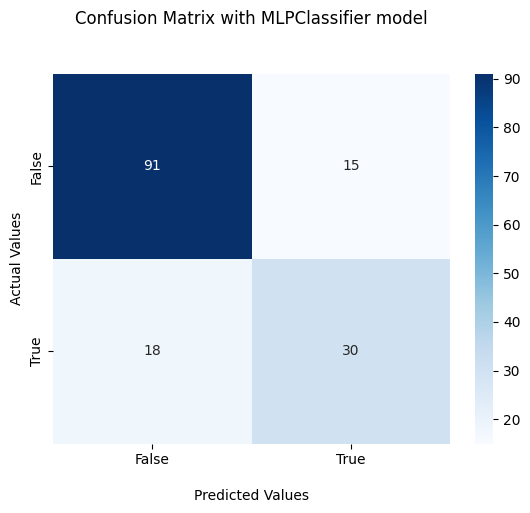

,train,test
f1_score,0.66,0.65
jaccard_score,0.49,0.48
accuracy,0.77,0.79
recall,0.62,0.62
precision,0.71,0.67


In [33]:
model_name = ["MLPClassifier", "NN"]
best_estimator_result(best_nn_model, model_name, data, True)


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

Trả lời:
<p> <b>hidden_layer_sizes</b>: the number of neurons in the hidden layer </p>
<p> <b>activation:</b> actionvation function use to transform to another form of value</p>
<ul>
<li>identity: no transform value, return f(x) = x </li>
<li>logistic: tranform to the logistic sigmoid function, return = 1/1+exp(-x)</li>
<li>tanh: the hyperbolic tan function, returns f(x) = tanh(x)</li>
<li>relu: get max value, returns f(x) = max(0, x). Very fast</li>
</ul>

<p> <b>batch_size:</b> size of minibatches for stochastic optimizers, if hardware of computer small -> batch size should be [8, 16, 32] avoid crash hardware during training model</p>
<p> <b>solver:</b>solver for weight optimization/p>
<ul>
<li>lbfgs</li>
<li>sgd: refers to stochastic gradient descen -> find min cost using derivertive by cost function</li>
<li>adam</li>
</ul>
<p><b>learning_rate_init:</b> the initial learning rate used, it controls the step-size in updating the weights. If lr larger -> step-size larger and by contrast.</p>

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [16]:
from sklearn.ensemble import VotingClassifier

In [61]:
# initialize model Voting Classifier with soft voting ensemble using the best estimator have been trained above
best_votting_model =  VotingClassifier(estimators=[['knn', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')],
                             ['dt', tree.DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_leaf_nodes=24, min_samples_leaf=11)],
                             ['lr', LogisticRegression(C=0.01, solver='liblinear')],
                             ['svc', SVC(C=1, coef0=0.1, degree=1, kernel='linear', probability=True)],
                             ['nn', MLPClassifier(activation='logistic', batch_size=8, hidden_layer_sizes=400, solver='sgd')]],
                voting='soft')
best_votting_model.fit(X_train, y_train)

VotingClassifier(estimators=[['knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_neighbors=20,
                                                   weights='distance')],
                             ['dt',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=7,
                                                     max_leaf_nodes=24,
                                                     min_samples_leaf=11)],
                             ['lr',
                              LogisticRegression(C=0.01, solver='liblinear')],
                             ['svc',
                              SVC(C=1, coef0=0.1, degree=1, kernel='linear',
                                  probability=True)],
                             ['nn',
                              MLPClassifier(activation='logistic', batch_size=8,
                                            hidden_layer_sizes=400,
                                            solver='sgd')]],
                 voting='soft')

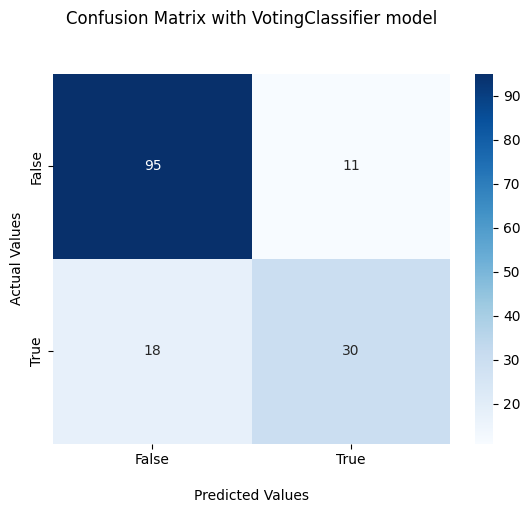

,train,test
f1_score,0.85,0.67
jaccard_score,0.74,0.51
accuracy,0.90,0.81
recall,0.80,0.62
precision,0.91,0.73


In [62]:
model_name = ["VotingClassifier", 'EN_SOFT']
best_estimator_result(best_votting_model, model_name, data, True)

## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [63]:
# initialize model Voting Classifier with hard voting ensemble using the best estimator have been trained above
best_votting_model =  VotingClassifier(estimators=[['knn', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')],
                             ['dt', tree.DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_leaf_nodes=24, min_samples_leaf=11)],
                             ['lr', LogisticRegression(C=0.01, solver='liblinear')],
                             ['svc', SVC(C=1, coef0=0.1, degree=1, kernel='linear', probability=True)],
                             ['nn', MLPClassifier(activation='logistic', batch_size=8, hidden_layer_sizes=400, solver='sgd')]],
                voting='hard')
best_votting_model.fit(X_train, y_train)

VotingClassifier(estimators=[['knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_neighbors=20,
                                                   weights='distance')],
                             ['dt',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=7,
                                                     max_leaf_nodes=24,
                                                     min_samples_leaf=11)],
                             ['lr',
                              LogisticRegression(C=0.01, solver='liblinear')],
                             ['svc',
                              SVC(C=1, coef0=0.1, degree=1, kernel='linear',
                                  probability=True)],
                             ['nn',
                              MLPClassifier(activation='logistic', batch_size=8,
                                            hidden_layer_sizes=400,
                                            solver='sgd')]])

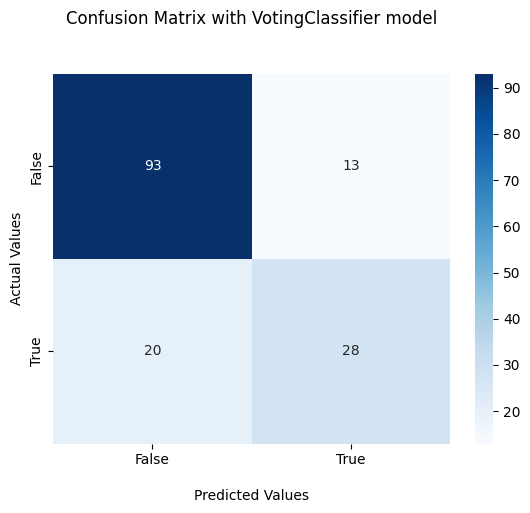

,train,test
f1_score,0.70,0.63
jaccard_score,0.54,0.46
accuracy,0.80,0.79
recall,0.65,0.58
precision,0.75,0.68


In [64]:
model_name = ["VotingClassifier", 'EN_HARD']
best_estimator_result(best_votting_model, model_name, data, True)

# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

In [90]:
# create columns
index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Neural Network', 'Hard Voting', 'Soft Voting']
f1_scores_test = f1_scores['test'].values()
f1_scores_train = f1_scores['train'].values()
jaccard_scores_test = jaccard_scores['test'].values()
jaccard_scores_train = jaccard_scores['train'].values()
# build dictionary contain scores of each model
dict_result = {
    'Algorithm': index,
    'Jaccard-training': jaccard_scores_train,
    'F1-score-training': f1_scores_train,
    'Jaccard-testing': jaccard_scores_test,
    'F1-score-testing': f1_scores_test
}
# build dataframe
df_result = pd.DataFrame(dict_result)
df_result

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,1.00,1.00,0.47,0.64
1,Decision Tree,0.58,0.73,0.47,0.64
2,SVM,0.47,0.64,0.45,0.62
3,Logistic Regression,0.48,0.65,0.46,0.63
4,Neural Network,0.49,0.66,0.48,0.65
5,Hard Voting,0.54,0.70,0.46,0.63
6,Soft Voting,0.74,0.85,0.51,0.67


| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | 1.00 | 1.00 |  0.47 |  0.64 |
| Decision Tree | 0.58 | 0.73 |  0.47 |  0.64 |
| SVM | 0.47 | 0.64 |  0.45 |  0.62 |
| Logistic Regression| 0.48 | 0.65 |  0.46 |  0.63 |   
| Neural Network| 0.49 | 0.66 |  0.48 |  0.65 |
| Hard Voting | 0.54 | 0.70 |  0.46 |  0.63 |
| Soft Voting | 0.74 | 0.85 |  0.51 |  0.67 |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [93]:
index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Neural Network', 'Hard Voting', 'Soft Voting']
f1_scores_test = f1_scores['test'].values()
f1_scores_train = f1_scores['train'].values()
jaccard_scores_test = jaccard_scores['test'].values()
jaccard_scores_train = jaccard_scores['train'].values()
dict_result = {
    'Algorithm': index,
    'Jaccard-training': jaccard_scores_train,
    'F1-score-training': f1_scores_train,
    'Jaccard-testing': jaccard_scores_test,
    'F1-score-testing': f1_scores_test
}
df_result = pd.DataFrame(dict_result)
df_result

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,1.00,1.00,0.47,0.64
1,Decision Tree,0.58,0.73,0.47,0.64
2,SVM,0.47,0.64,0.45,0.62
3,Logistic Regression,0.48,0.65,0.46,0.63
4,Neural Network,0.49,0.66,0.48,0.65
5,Hard Voting,0.54,0.70,0.46,0.63
6,Soft Voting,0.74,0.85,0.51,0.67


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời: các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ, bởi vì phương pháp ensemble là tổng hợp các kết của nhiều model khác nhau (SVM classifier, Decision Tree classifier, ogistic Regression classifier, and so on) thành mô hình cuối cùng -> nâng cao tính khái quát của model Machine Learning. 
Kết quả của phương pháp ensemble giống như 1 cuộc bỏ phiếu giữa các model khác nhau để có kết quả tốt hơn. 